# Graph Neural Network (GNN)

## torch.geometric Dataset 구성
data를 정의하고 data를 실행 하면 data.x와 dta.edge_index의 형태는 아래와 같이 나옴
- data.x : Node Features Matrix, 차원 구성 : [num_nodes, num_node_features]
- data.edge_index : 그래프 연결성, 차원 구성: [2, num_edges]

- data.edge_attr : Edge Feature Matrix, 차원 구성 : [num_edges, num_edge_features]
- data.y : 학습 대상, Graph Label -> [num_nodes, *], Node Label -> [1, *]
- data.pos : Node Position Matrix, [num_nodes, num_dimensions]

In [1]:
# pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cpu
import torch
torch.__version__

'2.4.1+cpu'

In [2]:
# pip install list
# Mac 설치 위주로 설명되어 있으며, 운영체제에 따라 확인 후 설치하기

# torch \ torch-geometric \ torch-sparse \ torch-scatter \ torch-cluster \ pyg-lib \ -f https//:data.pyg.org/whl/torch-{torch.__version__}.html

# scatter는 mac에서 gpu를 지원하지 않음. 아마 다른 패키지도 지원 안 할 가능성이 높임 (https://pypi.org/project/torch-scatter/)

# torch-geometric ==> pip install torch_geometric
# torch-sparse ==> conda install pytorch-sparse -c pyg or pip install torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+${CUDA}.html
# torch-scatter ==> conda install pytorch-scatter -c pyg or pip install torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+${CUDA}.html
# ctorch-cluster ==> conda install pytorch-cluster -c pyg or pip install torch-cluster -f https://data.pyg.org/whl/torch-2.1.0+${CUDA}.html
# pyg-lib ==> pip install pyg-lib -f https://data.pyg.org/whl/torch-{torch.__version__}+{CUDA}.html
#             torch.__version__ : 2.4.1, CUDA : cpu
#             따라서, pip install pyg-lib -f https://data.pyg.org/whl/torch-2.4.1+cpu.html
 
# torch, torch-geometric, torch-sparse, ... ==> conda, pip 통일 안해주면 torch import 할 때 error 발생해

In [3]:
# Torch Graph set 만들기
import torch
from torch_geometric.data import Data

edge_index = torch.tensor(
    [[0, 1, 1, 2],
    [1, 0, 2, 1]], dtype=torch.long)

x = torch.tensor(
    [[-1], [0], [1]], dtype=torch.float)

In [4]:
data = Data(x=x, edge_index=edge_index)

In [5]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [6]:
data.x

tensor([[-1.],
        [ 0.],
        [ 1.]])

In [7]:
data.edge_index

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [8]:
# 연속적인 Graph set

edge_index = torch.tensor(
    [[0, 1],
    [1, 0],
    [1, 2]], dtype=torch.long
)

x = torch.tensor(
    [[-1,],
    [0],
    [1]], dtype=torch.float
)

data = Data(x=x, edge_index=edge_index.t().contiguous())

In [9]:
data

Data(x=[3, 1], edge_index=[2, 3])

In [10]:
data.x


tensor([[-1.],
        [ 0.],
        [ 1.]])

In [11]:
data.edge_index

tensor([[0, 1, 1],
        [1, 0, 2]])

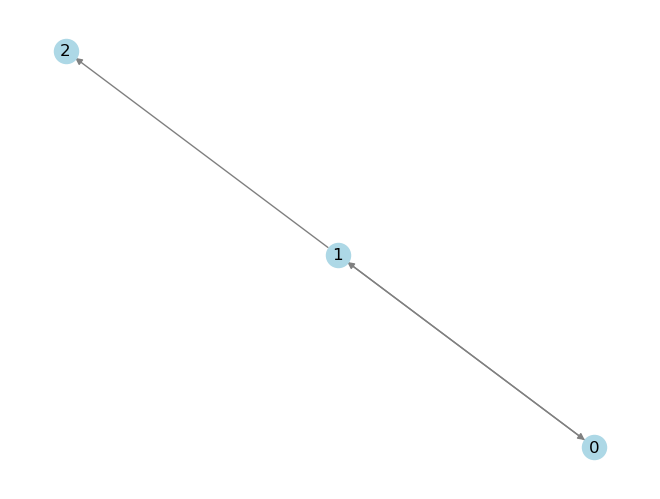

In [15]:
# Graph Visualization
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=False)

# 그래프 그리기
nx.draw(
    G, with_labels=True,
    node_color = "lightblue",
    edge_color="gray",
    arrowstyle="-|>",
    arrowsize=10
)
plt.show()

### torch_geometric.data.Data 클래스의 사용 함수
 - .keys : 해당 속성 이름
 - .num_nodes : 노드 총 개수
 - .num_edges : 엣지 총 개수
 - .contains_isolated_nodes() : 고립 노드 여부 확인
 - .contains_self_loops() : 셀프 루프 포함 여부 확인
 - .is_directed() : 그래프의 방향서 여부 확인

### Cora Dataset
 - 머신런닝 분야의 2,708 편의 논문을 노드로 표현
 - 논문 가느이 인용 관계를 5,429개 무방향 엣지(undirected graph)로 나타냄
 - 각 노드는 논문에서 사용된 단어의 존재 여부를 이진 값(0 or 1)으로 표시한 1,433 차원의 희소 벡터(Bag-of-Words)를 feature로 가짐
 - 논문은 7개 주제 카테고리(예: 신경망, 강화학습, 확률적 방법 등)로 분류되며, 이는 노드의 라벨로 사용됨
 - 데이터는 아래와 같은 미리 정의된 분할 방식으로 나뉘어져 있음
 1) 학습용 데이터는 각 클래스당 20개씩 총 140개 노드로 구성
 2) 검증용 500개
 3) 테스트용 1,000개의 노드가 별도 할당됨

In [16]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='dataset', name='Cora')

In [17]:
dataset.num_classes

7

In [18]:
dataset.num_node_features

1433

In [25]:
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [26]:
data.is_undirected()

True

In [27]:
data.train_mask.sum().item()

140

In [30]:
data.val_mask.sum().item()

500

In [31]:
data.test_mask.sum()

tensor(1000)

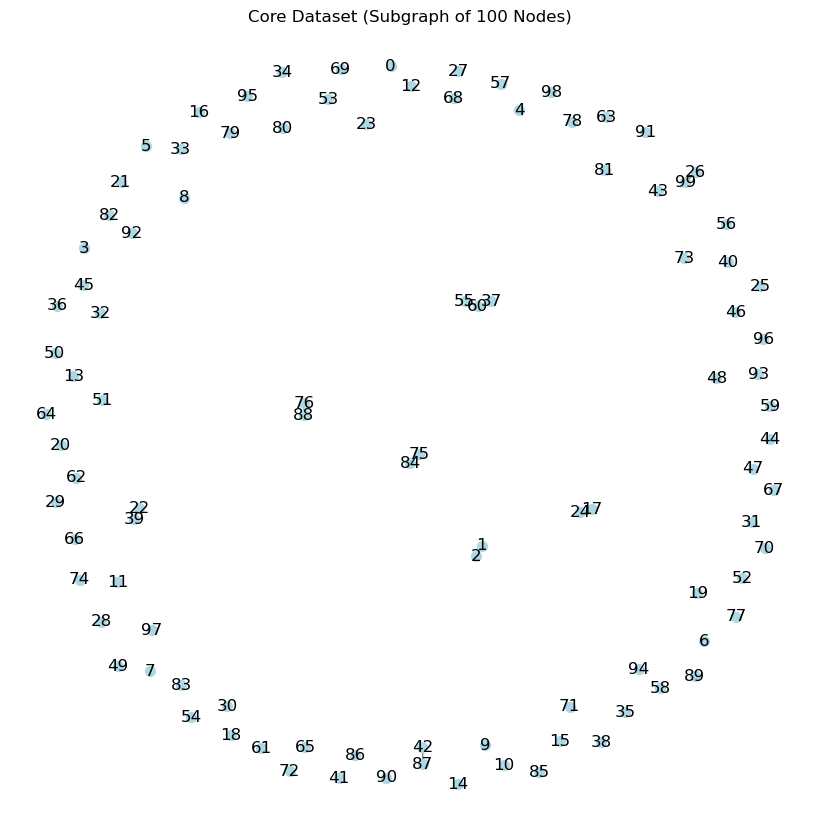

In [39]:
# Cora Dataset 시각화

import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Cora 데이터셋의 첫 번쨰 그래프 데이터 로드
data = dataset[0]

# 전체 그래프를 Networkx로 변환 (방향성 없음)
G = to_networkx(data, to_undirected=True)

# 서브 그래프 추출(예: 첫 100개 노드만 선택)
subgraph_nodes = list(G.nodes)[:100]
subgraph = G.subgraph(subgraph_nodes)

# 그래프 시각화
plt.figure(figsize=(8,8))
pos = nx.spring_layout(subgraph, seed=42) # 레이아웃 설정
nx.draw(
    subgraph,
    pos,
    node_size=50,
    with_labels=True,
    edge_color="gray",
    node_color="lightblue"
)
plt.title("Core Dataset (Subgraph of 100 Nodes)")
plt.show()

### Data Transform
 - pytorch는 Torch Tensor를 기반으로 함.
 - Pytorch는 Array 배열을 tensor로 변경, 전환 등의 Transform을 지원함.

In [43]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures, RandomLinkSplit, AddSelfLoops
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt